# Lab 1 - Reviewing Statistics and R

This is your first lab for the Introduction to Statistical and Mathematical Foundations of Data Science course. You can refer to chapters 1 to 3 in [intro to statistics textbook](http://onlinestatbook.com/2/index.html) book for reference. 

We will look into basics of statistics mainly for univariate data analysis. Some of the basic concepts like descriptive and inferential statistics, distributions, graphing and summarizing distributions using measures of central tendency and variability are explained through R commands. 

Some of the concepts may have been covered in Intro to Data Science course. We will refresh those concepts here a little bit. We will look into the miles per gallon dataset in this notebook.


### Loading data

Load the data `auto-mpg` into R and view the first few rows (including the column names (called the header)) in the following way. This data is about city-cycle fuel consumption based on different types of cars.

In [26]:
auto_mpg <- read.csv("../../../datasets/auto-mpg/auto-mpg.csv", header = T, sep=",")




We can get a quick view of some of the relavent information about the data set `auto_mpg` using head() function. **`head()`** shows the first five rows by default (including the header) if no argument is provided.   Just typing the R variable `auto_mpg` will return all the rows in the table which is time consuming if you are dealing with a very big dataset. Head() is really handy when you just want to see how the data looks.

In [2]:
head(auto_mpg)

mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin,car.name
18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165.0,3693,11.5,70,1,buick skylark 320
18,8,318,150.0,3436,11.0,70,1,plymouth satellite
16,8,304,150.0,3433,12.0,70,1,amc rebel sst
17,8,302,140.0,3449,10.5,70,1,ford torino
15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


**names() ** : The auto_mpg dataset has the column names already set. But in many cases, a dataset will not have headers for the columns or the names need some formatting. names() function is helpful in manipulating the names of datframe columns. It is illustrated below how you can use this command. 


`Usage: names(x) <- value`


`It` shows the variable (i.e. column) names of the input dataframe `x`. You can also manipulate column names using this command. You can assign the variable names as a vector of names. If the length of character vector of names is less than number of variables in the dataframe, it is extended by character NAs to the length of x.

In [3]:
names(auto_mpg)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "model.year"   "origin"       "car.name"

In [4]:
#Assign names of auto_mpg columns to the variable 'column_names'
column_names=names(auto_mpg)

In [7]:
#Modify the names of columns of auto_mpg dataset by assigning new names.
names(auto_mpg)=c('a','b','c','d','e','f','g','h','i')
names(auto_mpg)


[1] "a" "b" "c" "d" "e" "f" "g" "h" "i"

Changing a specific column name. 

In [10]:
#Modify the name of first column of auto_mpg dataset.
names(auto_mpg)[1]='z'

In [11]:
#Display the names of auto_mpg columns
names(auto_mpg)

[1] "z" "b" "c" "d" "e" "f" "g" "h" "i"

In [12]:
#Assigning the original column names back to auto_mpg dataset variables.
names(auto_mpg)=column_names
names(auto_mpg)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "model.year"   "origin"       "car.name"


----
**`summary()`** 

Summary() command gives a summary of each variable in the dataframe. As shown below, the command is very informative. It gives minimum value, 1st quartile, 2nd quartile(median), mean value, 3rd quartile, and maximum values of numeric variables. If the variable has NA values, number of such rows with NA values is displayed too. 

You can use this information to quickly classify the variables into qualitative or quantitative(discrete or continue). For example all the variables in auto_mpg dataset except for origin and car.name are continuous where as origin is discrete and car.name is qualitative(nominal) variable.

In [13]:
summary(auto_mpg)

      mpg          cylinders      displacement     horsepower      weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   150.0  : 22   Min.   :1613  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.2   90.00  : 20   1st Qu.:2224  
 Median :23.00   Median :4.000   Median :148.5   88.00  : 19   Median :2804  
 Mean   :23.51   Mean   :5.455   Mean   :193.4   110.0  : 18   Mean   :2970  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0   100.0  : 17   3rd Qu.:3608  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   75.00  : 14   Max.   :5140  
                                                 (Other):288                 
  acceleration     model.year        origin                car.name  
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   ford pinto    :  6  
 1st Qu.:13.82   1st Qu.:73.00   1st Qu.:1.000   amc matador   :  5  
 Median :15.50   Median :76.00   Median :1.000   ford maverick :  5  
 Mean   :15.57   Mean   :76.01   Mean   :1.573   toyota corolla:  5  
 3rd Qu.:17.18   3rd Qu.:7

Do you wonder why there is no min,max,mean or other values given for horsepower variable. Same is the case with car.name but it makes sense for car.name varaible. It cant have minimum value or mean values as it has strings in it. You might wanna run str() function to understand the difference between horsepower and other numeric variables.

In [14]:
str(auto_mpg)

'data.frame':	398 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : Factor w/ 94 levels "?    ","100.0",..: 17 35 29 29 24 42 47 46 48 40 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model.year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ car.name    : Factor w/ 305 levels "amc ambassador brougham",..: 50 37 232 15 162 142 55 224 242 2 ...


Horsepower belongs to class or datatype `factor`. Factors are categorical variables. They are not treated as continuous variables. So the summary function couldn't calculate mean, median, min etc values for Horsepower variable. 

str() function tells you the datatype of variables, the dimensions of the dataframe and also an overview of kind of values each variable contains.

## Column Access in R

Recall, that column access in R is accomplished by using the __ \$ __ operator.  
```R
dataframe$columnName
```

**`summary(auto$weight)`** shows summary of `weight` variable of the `auto_mpg` data.

In [15]:
summary(auto_mpg$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1613    2224    2804    2970    3608    5140 

----
## Descriptive Statistics

Descriptive statistics are used to summarize and describe data. If we are analyzing miles per gallon data, for example, a descriptive statistic might be the percentage of cars with different number of cylinders , or the average miles per gallon for all cars. Many descriptive statistics are often used at one time to give a full picture of the data. 

Descriptive statistics are just descriptive. They cannot generalize anything beyond the data at hand. Generalizing from our data to another set of cases is dealt in inferential statistics. 

Descriptive statistics uses measures of Central Tendency and Spread to describe the data. R has built in functions to calculate mean,median,standard deviation etc which comes under measures of central tendency and spread.

These terms should be familiar from week 2 of the introductory data sciecne course.

In [16]:
#Lets run the head() command on auto_mpg to peek into the dataset.
head(auto_mpg)

mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin,car.name
18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165.0,3693,11.5,70,1,buick skylark 320
18,8,318,150.0,3436,11.0,70,1,plymouth satellite
16,8,304,150.0,3433,12.0,70,1,amc rebel sst
17,8,302,140.0,3449,10.5,70,1,ford torino
15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


----
#### Mean
Mean gives the average value of the column/variable. Mean is the most basic and important statistic which tries to answers many questions like average mpg for a particular cylinder vehicles, helps in understanding distribution of data of a variable some times etc.
    
    Mean = Sum of all Observations / No. of Observations

In [17]:
#paste function below is used to concatenate strings to make things readable. paste concatenates strings in the order they 
#are given as input. 
paste('Average auto displacement is: ',mean(auto_mpg$displacement))

[1] "Average auto displacement is:  193.425879396985"

On an average each vehicle has a displacement of 193.42. 

#### Mode
    
    Mode = Most occuring value in a set of values, i.e., a column of a dataframe
    
Mode is the value that has been repeated most frequently in a set of values. R does not have any built-in function to find out Mode. However, the mode() function returns the type or storage mode of the object instead. There are ways you can compute the _mode_(dataframe\$columnName). 

In [18]:
paste('Datatype of mpg is ',mode(auto_mpg$mpg))

# You can use a command like below to get the most frequently occuring value. 
# Table() command tells us distribution/count of different values of a variable. 
# So in below command we are printing the value which is maximum of table
#  command output. Simply put, maximum of count of values repeated. 
# Lets check how it works first by showing distribution of values in mpg variable and then use it to find the mode
table(auto_mpg$mpg)

#Find mode of mpg variable
paste("mode using which.max(): ",names(which.max(table(auto_mpg$mpg))))


#Or you can do as shown below which is complicated. 
actual_mode=table(auto_mpg$mpg)
paste('Most common value for miles per gallon is: ',names(actual_mode)[actual_mode == max(actual_mode)])

[1] "Datatype of mpg is  numeric"


   9   10   11   12   13   14 14.5   15 15.5   16 16.2 16.5 16.9   17 17.5 17.6 
   1    2    4    6   20   19    1   16    5   13    1    3    1    7    5    2 
17.7   18 18.1 18.2 18.5 18.6   19 19.1 19.2 19.4 19.8 19.9   20 20.2 20.3 20.5 
   1   17    2    1    3    1   12    1    3    2    1    1    9    4    1    3 
20.6 20.8   21 21.1 21.5 21.6   22 22.3 22.4 22.5   23 23.2 23.5 23.6 23.7 23.8 
   2    1    8    1    3    1   10    1    1    1   10    1    1    1    1    1 
23.9   24 24.2 24.3 24.5   25 25.1 25.4 25.5 25.8   26 26.4 26.5 26.6 26.8   27 
   2   11    1    1    2   11    1    2    2    1   14    1    1    2    1    9 
27.2 27.4 27.5 27.9   28 28.1 28.4 28.8   29 29.5 29.8 29.9   30 30.5 30.7 30.9 
   3    1    1    1   10    1    1    1    8    2    2    1    7    2    1    1 
  31 31.3 31.5 31.6 31.8 31.9   32 32.1 32.2 32.3 32.4 32.7 32.8 32.9   33 33.5 
   7    1    2    1    1    1    6    1    1    1    2    1    1    1    3    3 
33.7 33.8   34 34.1 34.2 34

[1] "mode using which.max():  13"

[1] "Most common value for miles per gallon is:  13"

**Note:** In the output above, the table is line-wrapping in the display
```
Value->   9   10   11   12   13   14 14.5   15 15.5   16 16.2 16.5 16.9   17 17.5 17.6 
Count->   1    2    4    6   20   19    1   16    5   13    1    3    1    7    5    2 

Value->   17.7   18 18.1 18.2 18.5 18.6   19 19.1 19.2 19.4 19.8 19.9   20 20.2 20.3 20.5
Count->      1   17    2    1    3    1   12    1    3    2    1    1    9    4    1    3

...
```

We see that 13 MPG occurs 20 times.

**Note:** What table() is actually doing is computing a histogram of the value for the given set / column.

This tells us, 13 is the most commonly occuring mileage(miles per gallon) of the vehicles. Of the 398 vehicles 20 vehicles have 13 miles per gallon. 13 was at position 5

#### Median
    
    Median = Mid point of all values. 

Median value divides the data set into two equal halves. One half lies to the left of median and the other to the right. Median values are less affected by outliers compared to mean. Therefore median is considered as ideal choice for measuring central tendency when the data is skewed. 

R has builtin function to calculate median. Lets calculate the median for displacement variable in auto_mpg.

In [19]:
paste("median: ",median(auto_mpg$acceleration))

[1] "median:  15.5"

Of the 398 observations in the dataset, 199 observations have acceleration less than or equal to 15.5 and other 199 observations have acceleration greater than or equal to 15.5

#### Range
    
    Range = (lowest value,highest value)
    
Range is a measure of spread, how values are spread in the variable. You will get to know the amount of variation in the data. R has builtin function to calculate range.

In [20]:
range(auto_mpg$model.year)

[1] 70 82

So the dataset has cars with the model numbers starting from year 70 to year 82

#### Quantile

Quantile function divides the data set into 4 equal parts as first Quantile(Q1), Second Quantile(Q2), Third Quantile(Q3) and fourth quantile(Q4).

Quantiles are well understood when used with box plots. Box plots summarize and identify minimum, maximum, Q1, Q2 and Q3 values of a variable.

In [21]:
quantile(auto_mpg$displacement)

0%    25%    50%    75%   100% 
 68.00 104.25 148.50 262.00 455.00

The command is very informative as it gives minimum, maximum, 25th percentile, 50th percentile(median) and 75th percentile values of the variable. Quantile is used for explaining the variance in the variable as it is less immune to outliers and explains variation better than other variability measures. 

#### Variance

    The average of the squared differences from the Mean.
    
It measures how widely the values in a variable vary. If the observations vary greatly from the variable mean, the variance will be big and vice versa. R has builtin function to calculate the variation so that we dont have to get into the math of it. 

In [22]:
paste('variance: ',var(auto_mpg$displacement))

[1] "variance:  10872.1991522474"

The above value represents the squared error of all the displacement values. Variance doesnt make much sense when trying to understand the spread of the data. Standard deviation will give us an idea how data is spread. 

#### Standard deviation

    SQRT(variance) = Standard Deviation

In [23]:
paste("standard deviation: ",sd(auto_mpg$displacement))

[1] "standard deviation:  104.269838171196"

The values in displacement variable, vary by deviation of 104.27 with the mean displacement of 193.42

## Variables in R

In statisical inference, there are basically two treatments of variables in a dataset, **Dependent** and **Independent** variables. The independent variables are used to predict the dependent variable's outcome. For example, in our auto-mpg dataset the variable 'mpg' can be dependent, i.e., it can be predicted other variables in the dataset.  

The variables often share a correlation among themselves. For example, the displacement of a vehicle might be correlated to mpg. Small vehicles tend to have more miles per gallon compared to big vehicles with low miles per gallon. A correlation between a dependent variable and an independent variable doesn't mean that independent variable is causing the changes in dependent variable. Its just dependent variables changes according to independent variable. 

### Types of Variables:

Most important distinction between variables is if they are either qualitative or quantitative. 

**Qualitative variables:** Variables that express a qualitative attribute such as religion, favorite movie, gender, and so on fall into this category. They are sometimes referred to as categorical variables. 

**Quantitative variables:** Variables that are measured in terms of numbers. Some examples are height, weight, and shoe size.

Generally speaking, when the variable has a numeric value, we call it quantitative data. When you classify something, we call it qualitative data.

##### Flavous of Quantitative data:

**Discrete variables: ** Data is discrete and can't be made more precise. For example, number of children in a family is discrete, because you are counting indivisible entities. You can't have 2.5 kids or 1.3 pets.

**Continuous data: ** Data can be reduced to finer levels or we can say it is continuous in nature. For example, you can measure the weight of yourself at different precise scales—kilograms, grams, milligrams and beyond. So weight is continuous data.


### Levels of measurment

Both qualitative and quantitative variables follow levels of measurment. 
There are 4 levels namely nominal, ordinal, interval and ratio scaled. 

**nominal:** Exmaple : car.name - since it just has car names has its values. 
More examples could be marital status, gender, religion affliation etc.

**ordinal:** Exmaple : cylinders - increase in the number of cylinders in a car mean higher horsepower. 
Number of cylinders in car have an order. 
More examples could be ranking of soldiers, grade a student belongs to, etc.

**interval: ** We can classify acceleration as interval scaled variable. 
As each interval for eg, 10-11, 11-12 makes sense. 
More examples could be Temperature, IQ level etc. 

**ratio:** We dont have a ratio scaled variable in the auto_mpg dataset. 
An example for ratio scaled variable could be daily calorie intake, GPA score. 
These values will make sense when you take a ratio with respect to something else like a students GPA compared to highest GPA in the class. 

These levels are explained in further detail in the [statistics online text book](http://onlinestatbook.com/2/introduction/levels_of_measurement.html).We will explore the concepts with the  _auto_mpg_ dataset columns and classify them into different kinds of varables.

In [24]:
summary(auto_mpg)

      mpg          cylinders      displacement     horsepower      weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   150.0  : 22   Min.   :1613  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.2   90.00  : 20   1st Qu.:2224  
 Median :23.00   Median :4.000   Median :148.5   88.00  : 19   Median :2804  
 Mean   :23.51   Mean   :5.455   Mean   :193.4   110.0  : 18   Mean   :2970  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0   100.0  : 17   3rd Qu.:3608  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   75.00  : 14   Max.   :5140  
                                                 (Other):288                 
  acceleration     model.year        origin                car.name  
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   ford pinto    :  6  
 1st Qu.:13.82   1st Qu.:73.00   1st Qu.:1.000   amc matador   :  5  
 Median :15.50   Median :76.00   Median :1.000   ford maverick :  5  
 Mean   :15.57   Mean   :76.01   Mean   :1.573   toyota corolla:  5  
 3rd Qu.:17.18   3rd Qu.:7

From above summary of data we can identify what kind of variable each one is

mpg - quantitative[continuous] : 

      mpg data is numeric and continuous in nature.

cylinders - quantitative[discrete] : 

      cylinders data is numeric and its discrete in nature with levels 3,4,5,6,8.

displacement - quantitative[continuous] : 

      Displacement data is numeric and continuous in nature.

horsepower - quantitative[continuous] : 

      Horsepower data is numeric and continuous in nature.

weight - quantitative[continuous] : 

      Weight data is numeric and continuous in nature.

acceleration - quantitative[continuous] : 

      Acceleration data is numeric and continuous in nature.

model.year - quantitative[discrete] : 

      model.year data is numeric but is discrete with values ranging from 70 through 82.

origin - quantitative[discrete] : 

      origin data is numeric and its discrete in nature with levels 1,2,3.

car.name - qualitative[nominal] : 

      Car names are nominal. So it is qualitative data. 

For variables, origin, model.year and cylinders the summary() doesn't give full information to classify them as continuous or discrete. You should explore the data and see the values in dataset to classify them as discrete.  

## Inferential Statistics

Inferential statistic measures helps us draw inferences about larger population from sample data. 
We try to gain insights from sample and generalize them on larger population. 
Let’s find out the inference which we can draw from _bdims_ data set we are going to work on. 
The dataset contains body dimensions data from 247 men and 260 women. 

Let’s say, we want to check the significance of variable sex for hypothesis testing.
Assume that males(sex 1) have more weight than average population weight.

To verify this assumption, let’s use z-test and see, if males are actually heavier than the over all population.


H0: There is no significant difference in the weights of men and women

H1: There is a better chance of men being heavier than average population weight

In [1]:
download.file("http://www.openintro.org/stat/data/bdims.RData", destfile = "bdims.RData")
load("bdims.RData")

A quick peek into first few rows of data

In [26]:
head(bdims)

bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,⋯,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,⋯,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,⋯,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,⋯,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,⋯,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,⋯,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,⋯,33.0,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5,1


In [28]:
names(bdims)

[1] "bia.di" "bii.di" "bit.di" "che.de" "che.di" "elb.di" "wri.di" "kne.di"
 [9] "ank.di" "sho.gi" "che.gi" "wai.gi" "nav.gi" "hip.gi" "thi.gi" "bic.gi"
[17] "for.gi" "kne.gi" "cal.gi" "ank.gi" "wri.gi" "age"    "wgt"    "hgt"   
[25] "sex"

From the above result you see that every observation has 25 measurements. The variable names description can be found at http://www.openintro.org/stat/data/bdims.php. We will work with just two columns for now: weight in kg (wgt) and sex (1 indicates male, 0 indicates female).

Lets go ahead and create two different data sets: for men and women as both have different body dimensions.

In [4]:
male <- subset(bdims, sex == 1)
female <- subset(bdims, sex == 0)

ERROR: Error in subset(bdims, sex == 1): object 'bdims' not found


### calculating Z-score

A z-score is a measure of how many standard deviations below or above the population mean an observation is or the number of standard deviations from the mean a data point is. Mathematically it is calculated as  

$$z = (x - \mu)/\sigma$$

where x = sample mean,
      $\mu$ = population mean and  
      $\sigma$ = population standard deviation  
      
Recall from the Introduction to Data Science \& Analytics course, the descriptive statistics and dispersion concept vidoes. Variance is the average difference squared from the mean; and standard deviation is then the square root of the variance.

In [3]:
 
 sample_mean = mean(male$wgt)
 pop_mean = mean(bdims$wgt)
 pop_var = var(bdims$wgt)
 print(paste("sample mean : ",sample_mean))
 print(paste("population mean : ",pop_mean))
 print(paste("population variance : ",pop_var))
 zscore = (sample_mean - pop_mean) / (sqrt(pop_var))
 print(paste("Z-score : ",zscore))


[1] "sample mean :  78.1445344129555"
[1] "population mean :  69.1475345167653"
[1] "population variance :  178.109376320447"
[1] "Z-score :  0.67414656194716"


In [4]:
# Below function is to calculate z score
#   You can write function since R is just like any other programming language. 
#   The function evaluates mean of sample and population, standard deviation 
#    of population and calculates z score.
z.score = function(sam, pop){
 sample_mean = mean(sam)
 pop_mean = mean(pop)
 pop_var = var(pop)
 zscore = (sample_mean - pop_mean) / (sqrt(pop_var))
 return(zscore)
}

#call function
#    WE are passing male weight in sample, population weight 
z.score(male$wgt, bdims$wgt)

[1] 0.6741466

The z score is 0.67 after rounding it to 2 decimals. 
Now we need to work out the percentage (or number) of men that weigh higher and lower than the population mean. 
We refer to the standard normal distribution table to find out this percentage value. 

![Standard Normal Distribution Table](../images/normal-table-large.png)

To read the table, we break our z-score into two parts 0.67 = 0.6 (_tenths_) + 0.07 (_hundreths_)

The tenths component is used to find the appropriate row in the table.  
The hundreths component is used for the column. 
You then find the cell in the table for that row and column, and this represents % of population with a smaller value.

Using the table, we can see that 74.86% of the population is lower than the average weight of men.

This affirms our hypothesis, H1 above, that males tends to have more weight than population weight.

In [6]:
sample_mean = mean(male$wgt)
pop_mean = mean(bdims$wgt)
pop_sd = sd(bdims$wgt)

# Instead of a table, use R
# probability under normal distribution for sample measure, mean, standard deviation.
p = pnorm(sample_mean, mean=pop_mean, sd=pop_sd, lower.tail=TRUE) 

# Since p is a probability, we can confer this to a percentage;  
print(p)
print(mean(male$wgt))
print(mean(bdims$wgt))

# UNCOMMENT THIS LINE TO READ DOCUMENTATION on pnorm, dnorm, etc.
help(pnorm)


[1] 0.7498909
[1] 78.14453
[1] 69.14753


### Correlation:

Correlation determines the level of association between two variables. A scatter plot among the variables is one of the ways to find correlation between variables. 

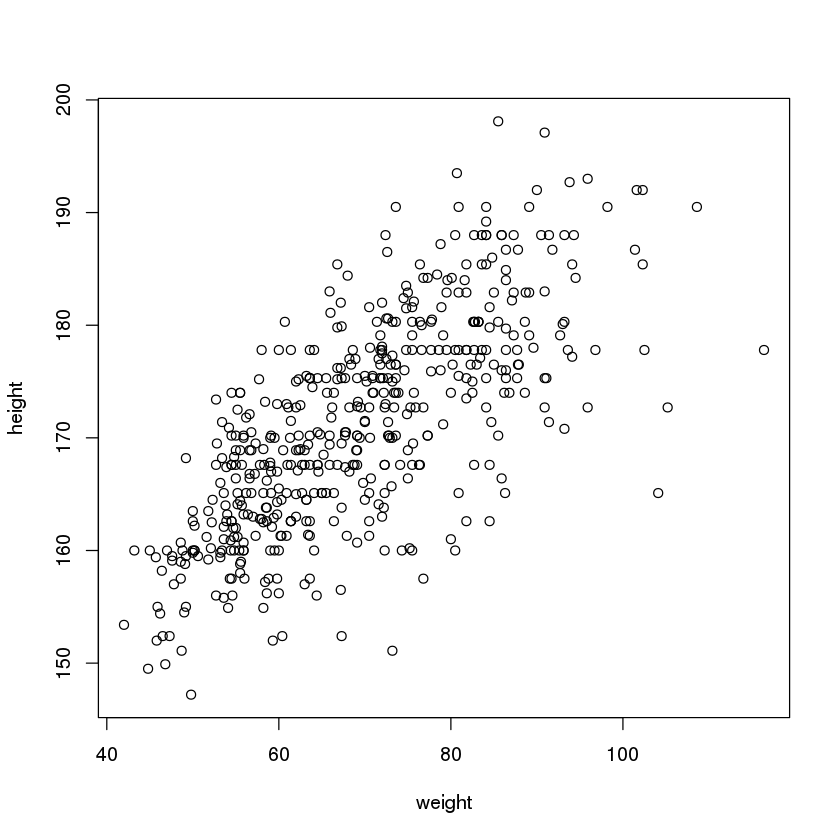

In [7]:
plot(bdims$wgt, bdims$hgt, xlab = 'weight', ylab = 'height')

We see a positive correlation among height and weight variables. R has a built in function to measure the correlation. Lets use the function to verify that height and weight variables are correlated.

In [8]:
cor.test(bdims$wgt, bdims$hgt, method = 'pearson')


	Pearson's product-moment correlation

data:  bdims$wgt and bdims$hgt
t = 23.135, df = 505, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6722075 0.7570923
sample estimates:
      cor 
0.7173011 


As the scatter plot suggests, correlation function supports our assumption that height and weight are associated. The level of corelation is 0.71. You can perform test on other variables in the dataset and similarly find association among other variables. Variables that are highly correlated, doesn't add much information to the model. You can also drop these variables from your final model.

# Distributions

We will look into the most common distribution of data you will find in statistics, **normal distribution**. Distribution tells us how population is spread across a dimension. We will use some R plots to assess the normality of our data. We will also look into some of the functions to generate random numbers from a normal distribution.

## Normal distribution:

A normal distribution can have data spread in different ways i'e skewed towards a side either left or right or in many cases tends to be around a central value with no bias. Many scenarios in everyday life follow a Normal Distribution like
heights of people, errors in measurements, marks on a test etc. We can say that the data is normally distributed. 

A normally distributed data satisfies following 
    * mean = median = mode
    * symmetry about the center
    * 50% of values less than the mean and 50% greater than the mean

There are many things you can do if you know that the distribution is normal. For example if you know standard deviation of a normal distribution, you can say that any value is:

    * likely to be within 1 standard deviation (68 out of 100 should be)
    * very likely to be within 2 standard deviations (95 out of 100 should be)
    * almost certainly within 3 standard deviations (997 out of 1000 should be)


For example, 95% of students at a certain school are between 1.1m and 1.7m tall. With how much confidence can you tell that one of your friend is 1.85 meters tall. 

<img src='../images/normal-distribution.gif'/>
    
    
    Mean is in the middle (1.1 + 1.7)/2 = 1.4 
    
    standard deviation is half of 95% on either side of the mean (a total of 4 standard deviations) so: (1.7-1.1)/4 = 0.15
    
    So where does the friend's height exactly stands in the distribution? We have to calculate z-score to find that.
    
            z = (Friend's height - mean height)/standard deviation
    
            z-score : 1.85-1.4/0.15 = 3
            
            z-score of 3 implies a confidence level of 99.9%.  So with a confidence of 99% you can say your friend is 1.85 meters tall


----
_There are 3 variety of measures to understand a distribution, _
    * Measure of Central tendency
    * Measure of dispersion
    * Measure to describe shape of curve

#### Measures of Central tendency:

Mean, median and mode are the measures of central tendencies. They help you describe a population, through a single metric. For example if you want to compare the average salary of a professor with other professions you will compare their mean salaries.

<img src='../images/central_tendency.gif'/>

Of all the three measures, mean is the one which is most affected by Outliers followed by the median and mode.

img source: https://www.analyticsvidhya.com/blog/2014/07/statistics/

#### Measures of Dispersion:

Range, Quartiles, Inter quartile range, variance and standard deviation are the measures of dispersion. They tell us how is the population distributed around the measures of central tendency. The image below shows two distributions with different standard deviations but same mean,median and mode.

<img src='../images/standard_deviation.png'/>

img source: wiki

#### Measures to describe shape of distribution:

**Skewness** – Skewness is used to measure the asymmetries of a distribution. Negatively skewed distribution has a long left tail and vice versa.

**Kurtosis** – Kurtosis is used to measure the height of the “peak” of the curve. Distributions with higher peaks have positive kurtosis and vice-versa

<img src='../images/skewness-and-kurtosis.gif'/>
img source: https://www.analyticsvidhya.com/blog/2014/07/statistics/

When describing the data, we can plot a normal distribution curve on top of a histogram to see how closely the data follow a normal distribution. We will work with women’s heights to illustrate this. Lets calculate some basic statistics and store them. we will use them soon.

In [10]:
female_hgt_mean <- mean(female$hgt)
female_hgt_sd   <- sd(female$hgt)

In [11]:
summary(female$hgt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  147.2   160.0   164.5   164.9   169.5   182.9 

We will use density histogram as the backdrop and use the lines function to overlay a normal probability curve. The difference between a frequency histogram and a density histogram is that while in a frequency histogram the heights of the bars add up to the total number of observations, in a density histogram the areas of the bars add up to 1. 

Using a density histogram allows us to properly overlay a normal distribution curve over the histogram since the curve is a normal probability density function. Frequency and density histograms both display the same exact shape; they only differ in their y-axis.

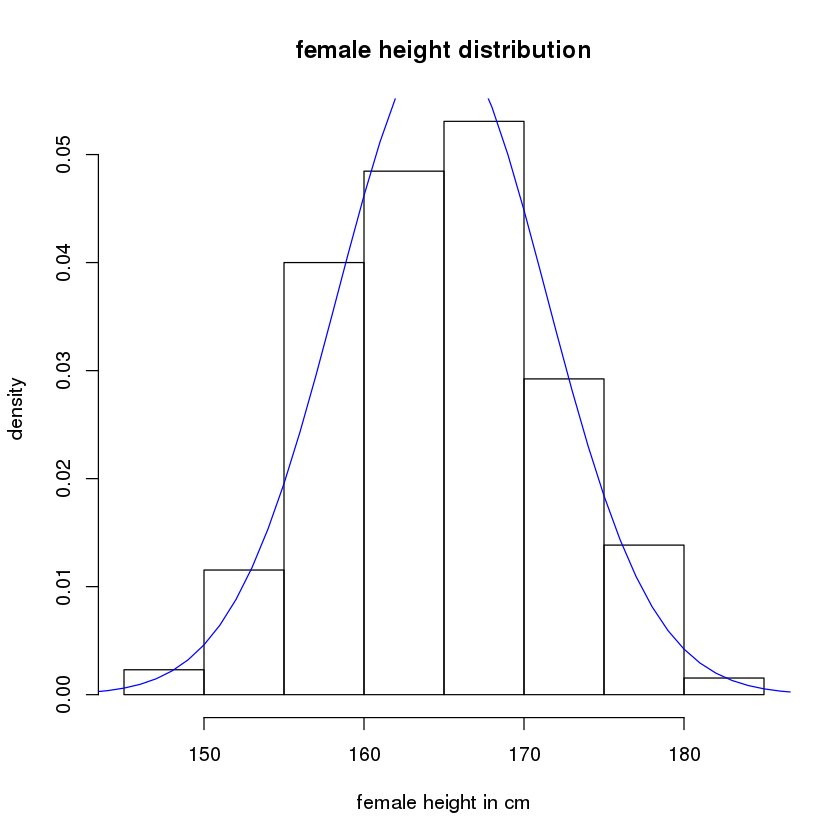

In [13]:
hist(female$hgt, probability = TRUE,main="female height distribution",xlab="female height in cm",ylab="density")
x <- 140:190
y <- dnorm(x = x, mean = female_hgt_mean, sd = female_hgt_sd)
lines(x = x, y = y, col = "blue")

The first command will plot the density histogram. We then create the x- and y-coordinates for the normal curve. x range is chosen as 140 to 190 to cover the minimum height(147.2) and maximum height(182.9). To create y, we use dnorm to calculate the density of each of those x-values in a distribution that is normal with mean female_hgt_mean and standard deviation female_hgt_sd. The last command draws a density curve on existing histogram by connecting x with corresponding values of y.

The top of the curve is cut off because the limits of the x and y axes are set to best fit the histogram. To adjust the y-axis we can add a third argument to the histogram function: ylim = c(0, 0.06).

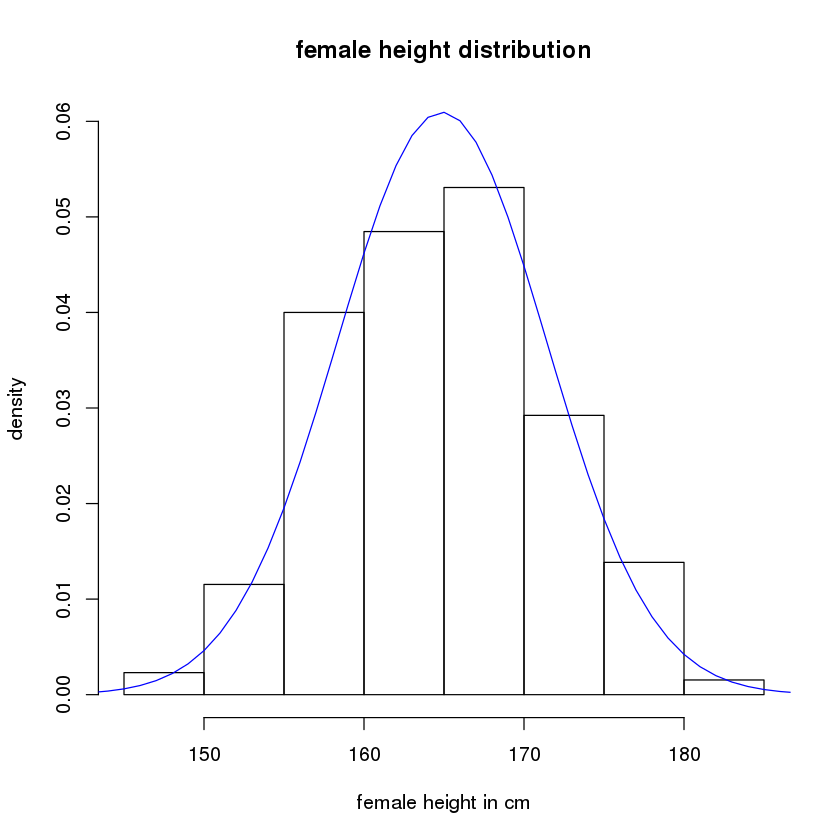

In [14]:
hist(female$hgt, probability = TRUE,main="female height distribution",xlab="female height in cm",ylab="density",ylim = c(0, 0.06))
x <- 140:190
y <- dnorm(x = x, mean = female_hgt_mean, sd = female_hgt_sd)
lines(x = x, y = y, col = "blue")

## Evaluating the normal distribution


How can we tell if the data appear to be nearly normally distributed?

We can inspect the above histogram and judge it. But we cannot decide just how close the histogram is to the curve. One approach to measure the distribution of data is to construct a normal probability plot, also called a normal Q-Q plot for “quantile-quantile”.

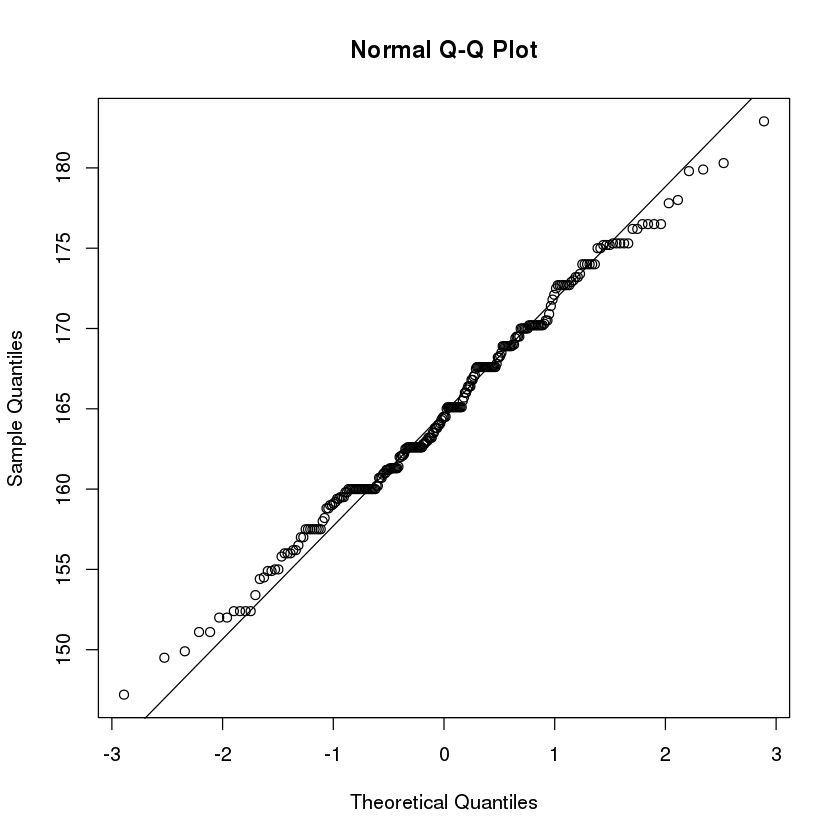

In [15]:
qqnorm(female$hgt)
qqline(female$hgt)

A data set that is nearly normal will result in a probability plot where the points closely follow the line. Any deviations from normality leads to deviations of these points from the line. The plot for female heights shows points that tend to follow the line but with some errant points towards the tails. We’re left with the same problem that we encountered with the histogram above: how close is close enough?

A useful way to address this question is to rephrase it as: what do probability plots look like for data that I know came from a normal distribution? We can answer this by essentially simulating data from a normal distribution using rnorm with similar mean and standard deviation as our original female heights data.

In [18]:
sim_norm <- rnorm(n = length(female$hgt), mean = female_hgt_mean, sd = female_hgt_sd)

Lets make a normal probability plot of sim_norm and see how the points fall on the line.

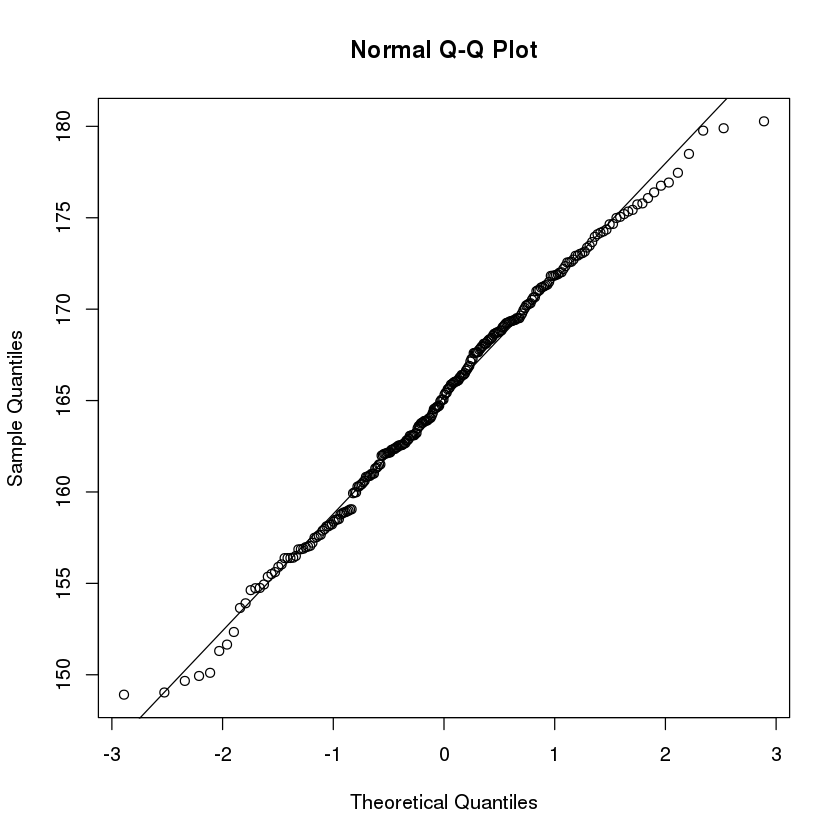

In [17]:
qqnorm(sim_norm)
qqline(sim_norm)

How does the above plot compare to the probability plot for the real data?

If you are still unsure of the answer there is even better way of comparing the original plot to compare it to many more plots using the following function.

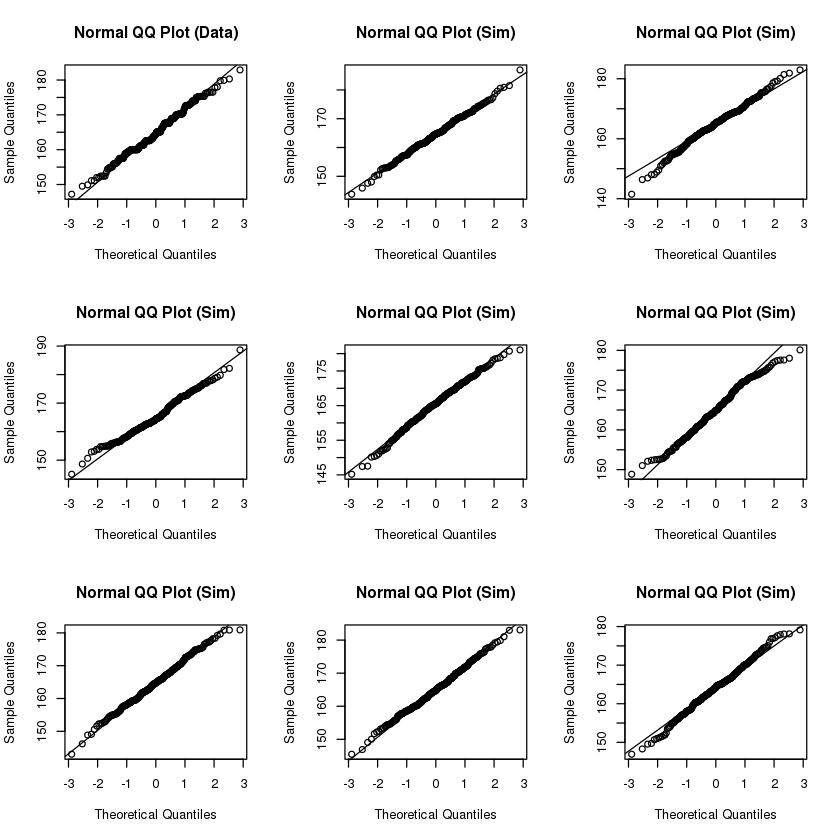

In [19]:
qqnormsim(female$hgt)

We can say the female heights are nearly normally distributed. Since we know that the data is normally distributed, we can answer all sorts of questions about that variable related to probability. 


For example, “What is the probability that a randomly chosen young adult female is taller than 6 feet (about 182 cm)?”

We can find this probability by calculating a Z score and consulting a Z table (also called a normal probability table). In R, this is done in one step with the function pnorm.

In [ ]:
pnorm(q = 182, mean = female_hgt_mean, sd = female_hgt_sd)

Note that the function pnorm gives the area under the normal curve below a given value, q, with a given mean and standard deviation. Since we’re interested in the probability that someone is taller than 182 cm, we have to take one minus that probability.

<img src="../images/normal.PNG"/>

If we want to calculate the probability empirically, we simply need to determine how many observations fall above 182 then divide this number by the total sample size.

In [20]:
sum(female$hgt > 182) / length(female$hgt)

[1] 0.003846154

# Graphing distributions

**Note**: The following is a short guide to graphing with R. Graphs tell us a story. Data is something we cannot use directly. Because we cannot go through each and every record to understand the dataset. Instead graphs will summarize and tell us a story which can be understood by someone with little or no technical knowledge. Pictures are the best way to do this. 

We've already covered some exercises in graphing in the Intro to Data Science course and we will see more in the visualization course but it's good to review some basics of what we'll be doing in this course.

Histograms, Bar plots will help visualize univariate data. Scatter plots will help visualize bi viriate data and see the correlations between variables. 

A bar plot and a pie chart are ideal if the data is categorical. This is how it works in case of a bar plot. A frequency table is generated from data which is then graphed as a bar plot. Data -> frequency table  -> bar graph

|no of cylinders|frequency|
|:-------------:|:-------:|
|3|4|
|4|204|
|5|3|
|6|84|
|8|103|


### Plotting a pie chart

As mentioned above, pie charts are great when the variable is categorical. Each category is represented by a slice of the pie. Our bdims dataset has just one categorical variable, gender. The area of each slice,i'e each category in the variable is proportional to the percentage of responses in that category. 

Pie charts are effective for displaying the relative frequencies of a small number of categories. They are not recommended, however, when you have a large number of categories.

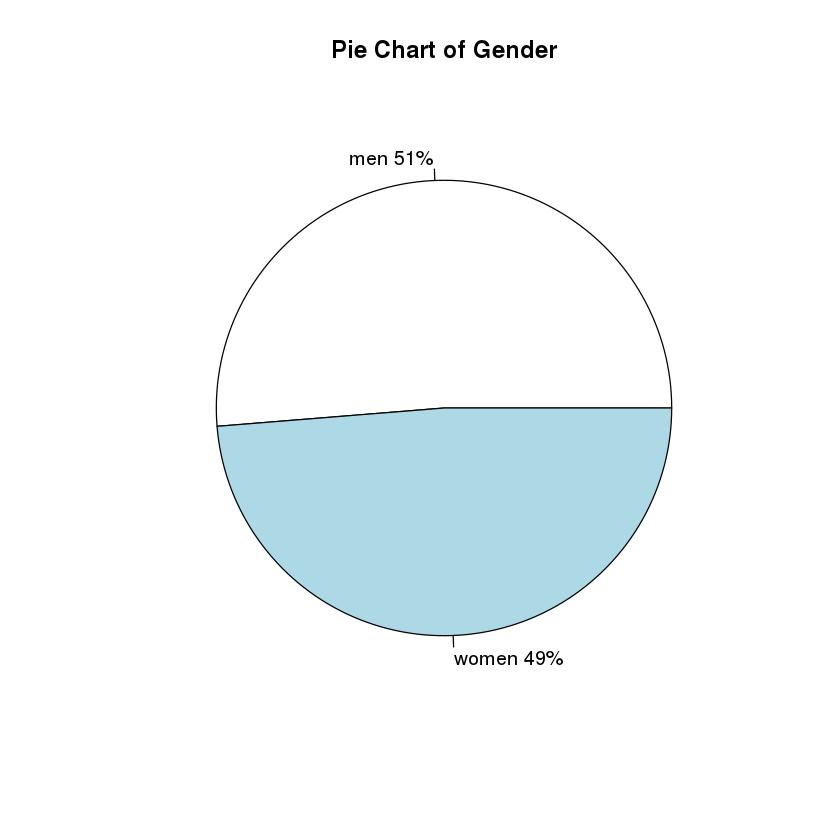

In [21]:
slices <- table(bdims$sex)
lbls <- c("men","women")
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add percents to labels 
lbls <- paste(lbls,"%",sep="") # ad % to labels 
pie(slices, labels = lbls, main="Pie Chart of Gender")

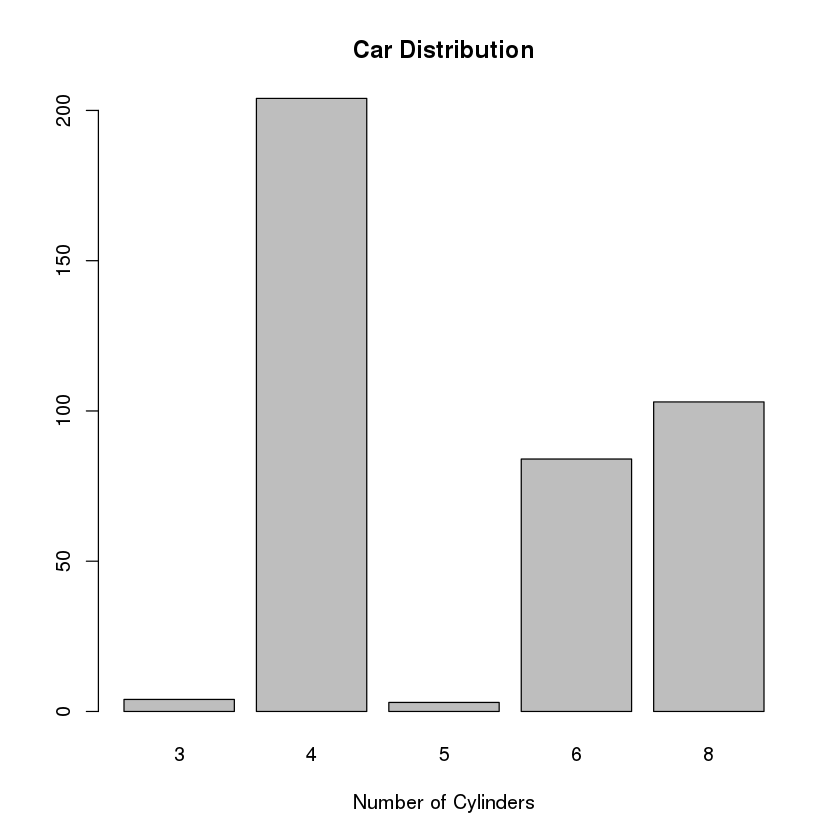

In [27]:
barplot(table(auto_mpg$cylinders), main="Car Distribution",xlab="Number of Cylinders")

Histograms are better way of visualizing the data if it is continous. Data is grouped into bins. The hist() function will choose an ideal bin value automatically if you dont supply one. But choosing your own bin value will help you understand the data better. Some times a small bin size will unearth interesting patterns some times large bin sizes are helpful.

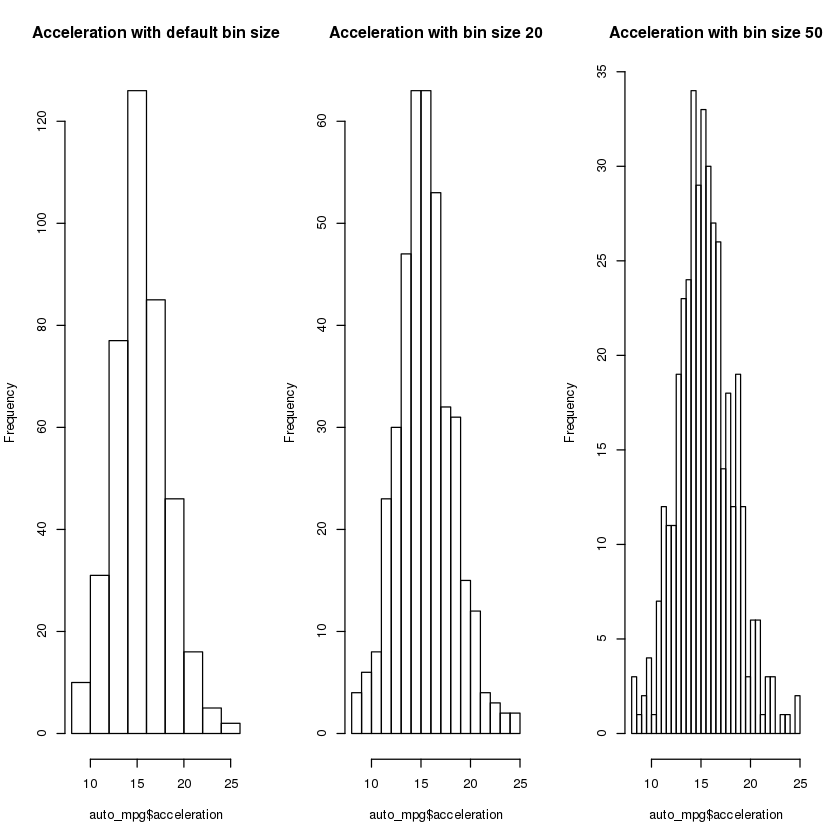

In [28]:
#par(mfrow()) help you create multi-paneled plotting window. mfrow() takes an input vector of length 2. The first argument 
#specifies the number of rows and the second the number of columns of plots.
par(mfrow=c(1,3))
#Default bin size is 25
hist(auto_mpg$acceleration, main="Acceleration with default bin size")
#breaks define number of elements you want in each bar. In other words, its the custom bin size
hist(auto_mpg$acceleration, main="Acceleration with bin size 20",breaks=20)
hist(auto_mpg$acceleration, main="Acceleration with bin size 50",breaks=50)

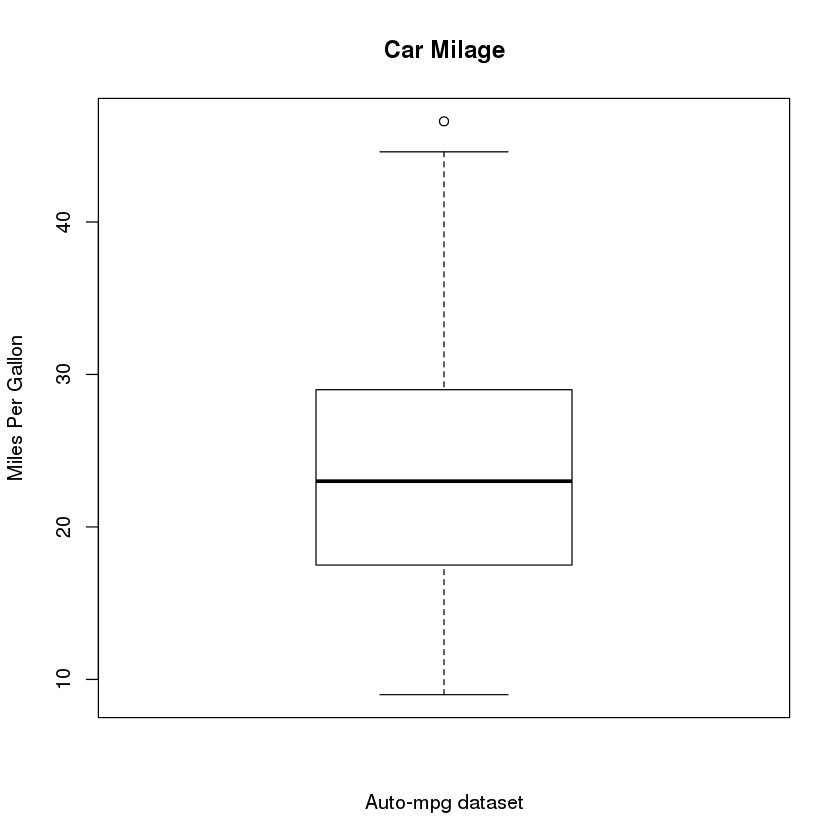

In [29]:
boxplot(auto_mpg$mpg,data=auto_mpg, main="Car Milage", xlab="Auto-mpg dataset", ylab="Miles Per Gallon")

(reference to the stats bootcamp on box plots) Recall that this box plot shows the min, 1st quartile, median, 3rd quartile, max, and outliers. The lowest bar is the min, the second lowest bar shows the 1st quartile (the cutoff point for the lowest 25% of all values), the thick middle line is the median (the cutoff point for the lowest 50%), the forth line is the 3rd quartile (the cutoff point for the lowest 75% of the values), and the highest horizontal line is the max. The circles represent the outliers. We can plot multiple boxplots from the auto_mpg data based on a second variable, say like number of cylinders.

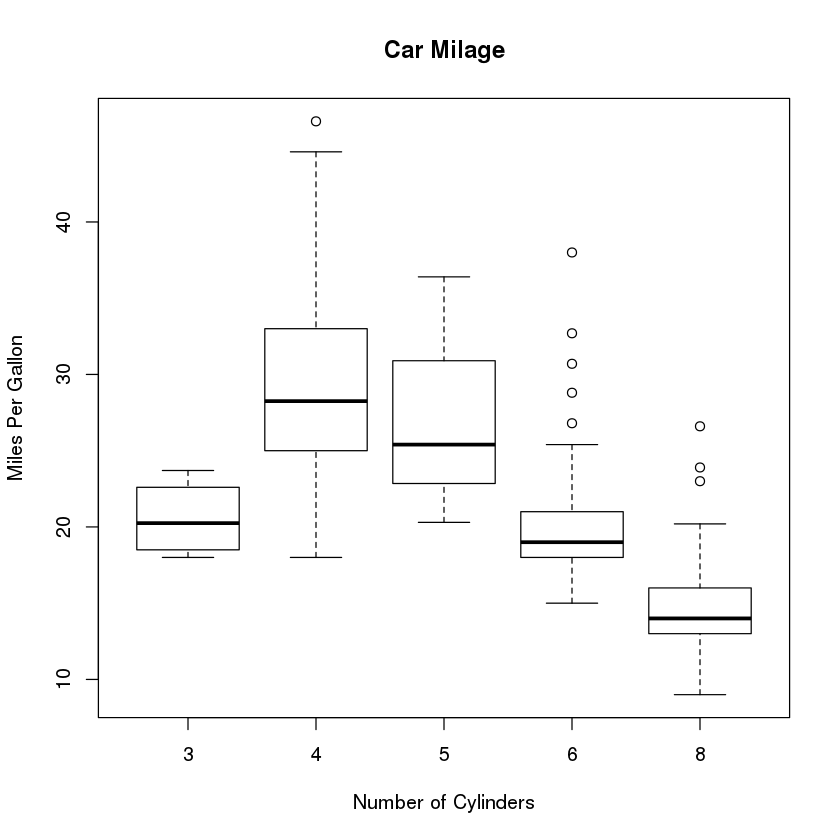

In [30]:
boxplot(auto_mpg$mpg~auto_mpg$cylinders,data=auto_mpg, main="Car Milage", xlab="Number of Cylinders", ylab="Miles Per Gallon")

**Explanation of the box plot**: The `auto` dataset has many variables. Two of them are "miles per gallon" and "number of cylinders". Here we break up the data by the number of cylinders and make a box plot for each category (3 cylinders, 4 cylinders, etc.) 

We can plot the number of cars in each cylinder category by using a box plot. We have to count all the cars in each category first and then plot them:

# Bivariate data


Bivariate data considers two variables simultaneously. For instance, below we can plot weight versus horsepower. 

X-Y, scatter plots are a great way to visually explore bivariate relationships.

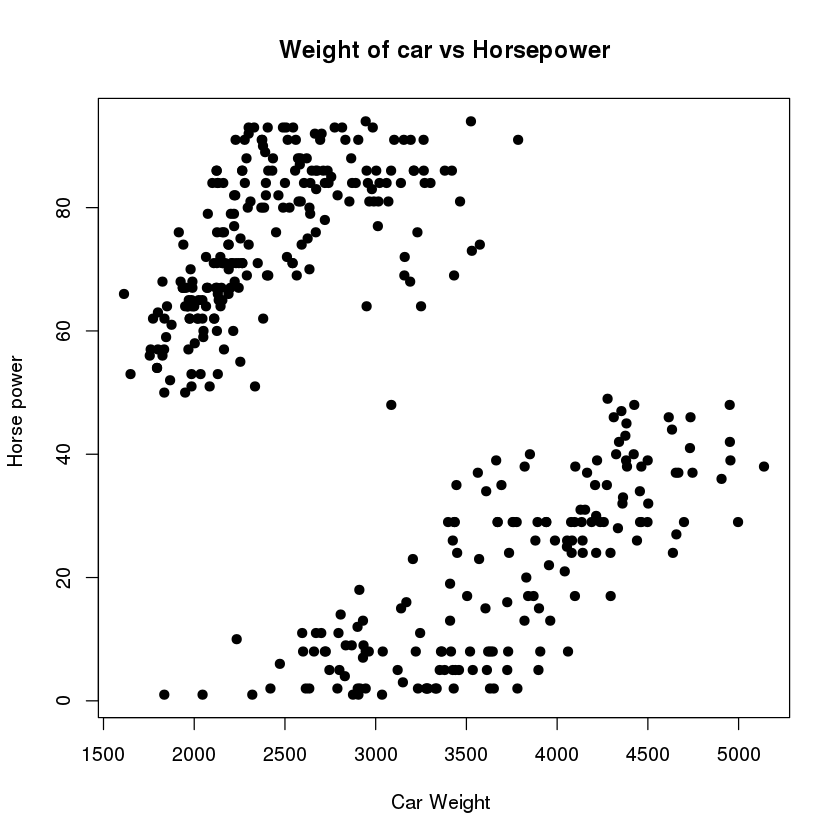

In [31]:
#plot is the basic command to plot a scatter plot. It takes x and y arguements for input variables. the parameter pch is used 
#to set the symbol used to denote the observations on the plot. Here pch=19 indicates solid circles. 
plot(auto_mpg$weight, auto_mpg$horsepower, main="Weight of car vs Horsepower", 
  	xlab="Car Weight ", ylab="Horse power ", pch=19)

A very common graph, that we'll see more often in the linear regression section, is the scatterplot. It just plots individual ordered pairs on a graph. The following is a scatterplot comparing the weight of the car and miles per gallon in the auto_mpg data set.  

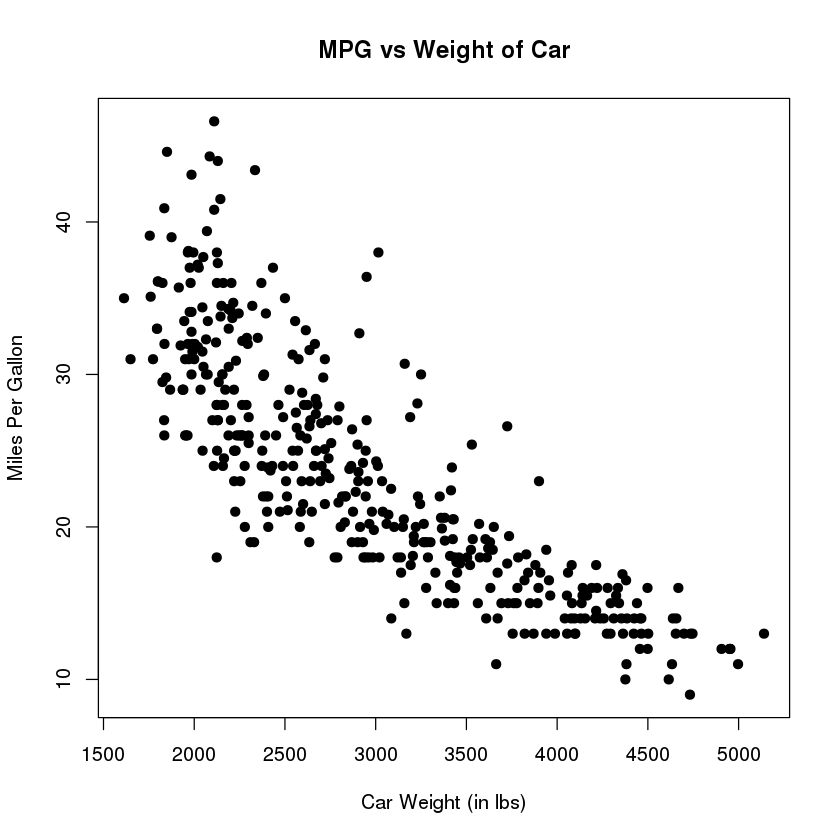

In [32]:
plot(auto_mpg$weight, auto_mpg$mpg, main="MPG vs Weight of Car", 
  	xlab="Car Weight (in lbs)", ylab="Miles Per Gallon", pch=19)

### Line Charts

Line charts are ond of the kinds of bivariate plots. Its implementation is not as easy as other types of charts. Line charts can be created using the function lines(x, y, type=) where x and y are numeric vectors of form (x,y) points to connect. the parameter `type=` takes different values as listed below for generating different kinds of points on the plot.

|type|	description|
|----|-------------|
|p   |   	points|
|l	 |   lines|
|o	 |   overplotted points and lines|
|b, c|	points (empty if "c") joined by lines|
|s, S|	stair steps|
|h	 |   histogram-like vertical lines|
|n	 |   does not produce any points or lines|

Lets go ahead and make a line plot with points for female heights

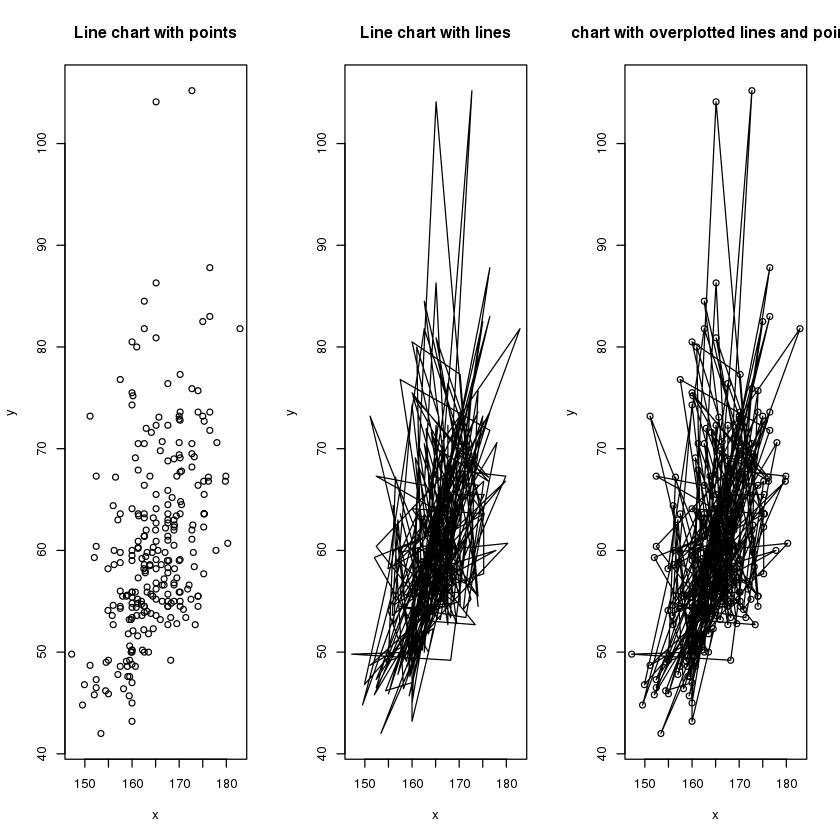

In [33]:
x <- female$hgt
y <- female$wgt
#par() is set to plot 3 different plots in the same panel.
par(mfrow=c(1,3))
plot(x, y, type="n", main="Line chart with points") 
lines(x, y, type='p') 
plot(x, y, type="n", main="Line chart with lines") 
lines(x, y, type='l') 
plot(x, y, type="n", main="chart with overplotted lines and points") 
lines(x, y, type='o') 

The plots above doesn't make any sense because the data is random and unordered. Lets see if we get a useful plot after sorting the data

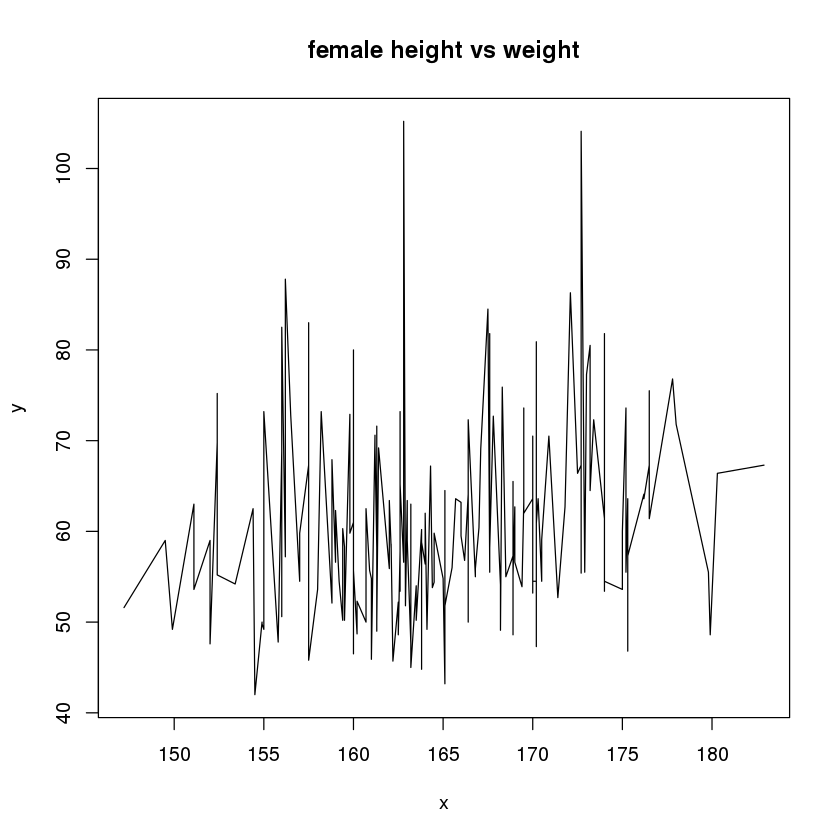

In [34]:
x <- sort(female$hgt)
y <- female$wgt
plot(x, y, type="n", main="female height vs weight") 
lines(x, y, type='l') 

The plot is still not aesthetic and readable. But lot better than the previous plot. So line charts make sense when the data is ordered. 

## Summarizing distributions

Its is important to understand how a variable is distributed before using the variable to fit a model. Some of the basic summerizing metrics we will look into are measures of central tendency(mean, median, mode), measures of variability(standard deviation, variance), percentiles.


#### central tendency

In [35]:
#Mean of the displacement distribution
paste('mean: ',mean(male$hgt))

#Mean of the displacement distribution
paste("median: ",median(male$hgt))

#R doesn't have a built in function for mode.

[1] "mean:  177.745344129555"

[1] "median:  177.8"

#### measures of variability

In [36]:
#standard deviation of the displacement distribution
paste("standard deviation: ",sd(male$hgt))

#Variance of the displacement distribution
paste('variance: ',var(male$hgt))

#Range of the displacement distribution gives lowest and highest values in distribution
paste('Range: ',range(male$hgt))

[1] "standard deviation:  7.18362867342674"

[1] "variance:  51.6045209176788"

[1] "Range:  157.2" "Range:  198.1"

#### percentiles

Definition from wiki: A percentile is a measure indicating the value below which a given percentage of observations in a group of observations fall. For example, the 20th percentile is the value (or score) below which 20% of the observations may be found.

We apply the R quantile function to compute the percentiles with the desired percentage ratios.

In [37]:
quantile(male$hgt, c(.20, .40, .90))

20%    40%    90% 
171.50 175.94 188.00

## Shapes of Distribution - Measure of center and Measure of spread

Understanding shape of a distribution is important part of intial exploratory data analysis. After getting descriptive statistics like mean, standard deviation, skewness etc. and using graphical techniques like histograms tells us which kind of probability density function to use to fit the model. Histograms provide information about multi modal behaviour, skewness and behaviour in tails. Here we are just dealing with normal distribution of data. 

We will generate some random samples for normal distribution using R statements and plot histograms. Consider we have a sample of size n=200 belonging from a normal population N(10,2) with mean=10 and standard deviation=2:

Go through the following link if you want to explore different kinds of distributions. Following example is taken from : https://cran.r-project.org/doc/contrib/Ricci-distributions-en.pdf

### Analyzing shape of distribution and measure of center

In [38]:
x.norm<-rnorm(n=200,m=10,sd=2)

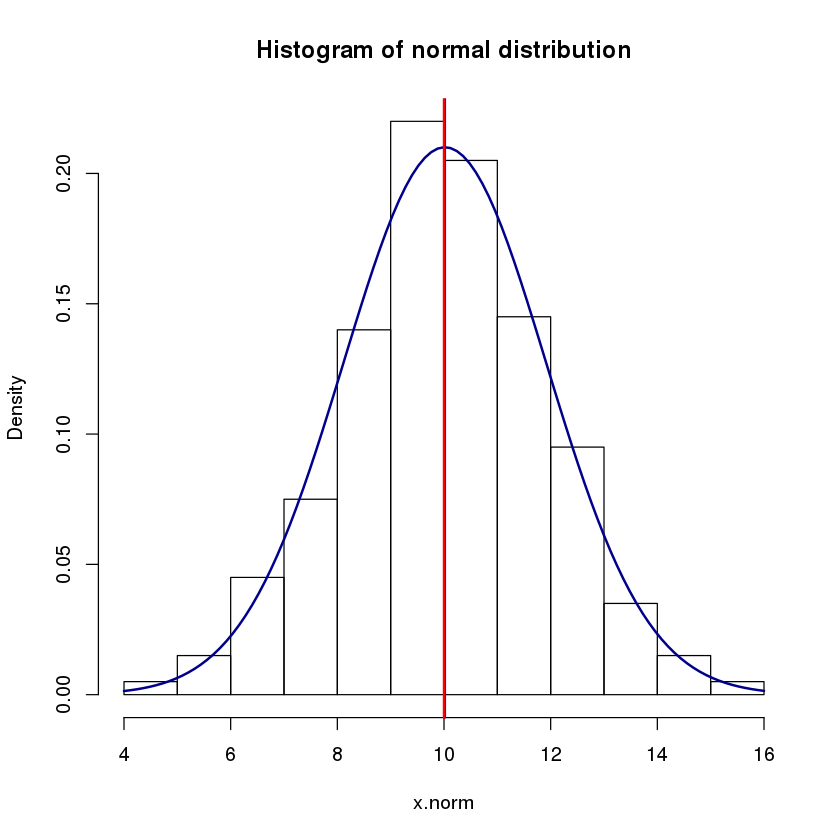

In [39]:
#Since the prob=TRUE, we will be plotting a density plot. The y-axis represents probability density of corresponding x values
hist(x.norm,prob=TRUE,main="Histogram of normal distribution")
#curve function helps us draw the density curve on the histogram. 
curve(dnorm(x, mean(x.norm), sd(x.norm)), add=TRUE, col="darkblue", lwd=2)

#calculate mean, median and sd to show them on the graph
mean_norm <- mean(x.norm)
median_norm = median(x.norm)
sd_norm=sd(x.norm)
#abline() will draw a vertical line on the graph at the specified x value. 
abline(v = mean_norm, col = "blue", lwd = 2)
abline(v = median_norm, col = "red", lwd = 2)
abline(v = sd_norm, col = "green", lwd = 2)

Above histogram represents a normal distribution of data with mean lying around 10 and standard deviation of 2. The data is aggregated close to the mean or the center and is symmetric on both sides.

In [40]:
paste('mean: ',mean(x.norm))
paste('median: ',median(x.norm))
paste('standard deviation: ',sd(x.norm))

[1] "mean:  10.0154849333755"

[1] "median:  10.0006136319952"

[1] "standard deviation:  1.8991062959191"

#### Left skewed data or negative skew

In [42]:
x.norm=sort(x.norm)
#Simulating data for plotting a left skewed distribution. We are removing the higher values from right end of sorted list whose 
#mean is 10 and sd is 2.
left_skewed=x.norm[1:150]

In [43]:
# the mean and median is shifted towards left because the data is right skewed. But the mode stays right where it is(Peak of 
# the data or most occuring value in the dataset). 

paste('mean: ',mean(left_skewed))
paste('median: ',median(left_skewed))

[1] "mean:  9.22392579548663"

[1] "median:  9.5091844089537"

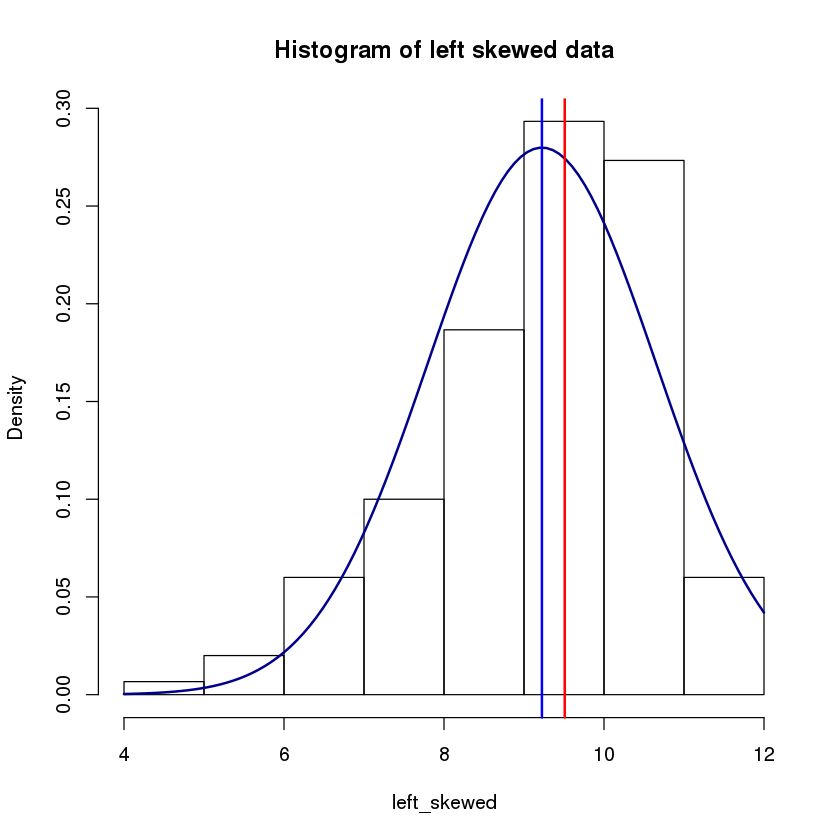

In [44]:
#We can get a histogram for this left skewed data using hist()statement

hist(left_skewed,prob=TRUE,main="Histogram of left skewed data")
curve(dnorm(x, mean(left_skewed), sd(left_skewed)), add=TRUE, col="darkblue", lwd=2)
mean_right <- mean(left_skewed)
median_right = median(left_skewed)
abline(v = mean_right, col = "blue", lwd = 2)
abline(v = median_right, col = "red", lwd = 2)

The graph has a long tail on left side. The mean and median has shifted towards left compared to normal distribution. 

#### Right skewed data or positive skew

In [45]:
#Simulating data for plotting a positive skewed distribution. We are removing the lower values from left end of sorted list whose 
#mean is 10 and sd is 2.
right_skewed=x.norm[51:200]

In [46]:
# the mean and median is shifted towards right because the data is right skewed. 

paste('mean: ',mean(right_skewed))
paste('median: ',median(right_skewed))

[1] "mean:  10.8324958310171"

[1] "median:  10.6411072760616"

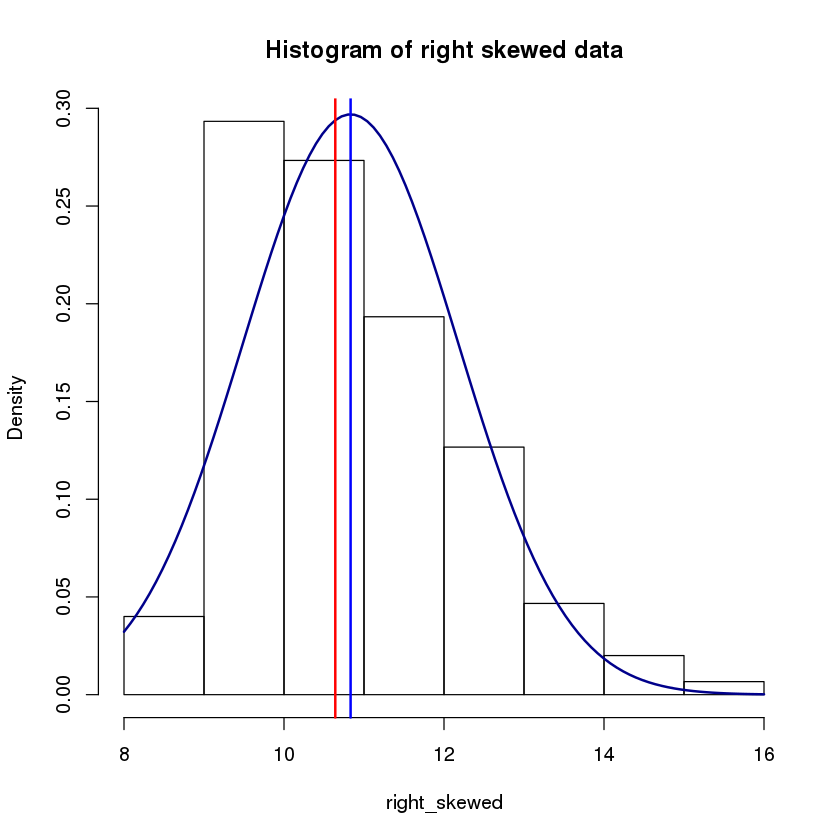

In [47]:
#Plot histogram for right skewed data

hist(right_skewed,prob=TRUE,main="Histogram of right skewed data")
curve(dnorm(x, mean(right_skewed), sd(right_skewed)), add=TRUE, col="darkblue", lwd=2)
mean_left <- mean(right_skewed)
median_left = median(right_skewed)
abline(v = mean_left, col = "blue", lwd = 2)
abline(v = median_left, col = "red", lwd = 2)

If the data is normally distributed/symmetrical and not skewed in either direction, mean would be an ideal choice if we want to measure the center. But when the data is skewed, for example if its positively skewed **mean** will give over estimate of the center and if its negatively skewed **mean** will give under estimate of the center. 

So, to conclude if the distribution is symmetrical, the measure of center should be **mean** and if the distribution is skewed in either direction measure of center should be **median**. Median would be the measure of the center that informs center of distribution without being affected too much by the skew as the mean does.

Like wise, standard deviation would be the choice of measure for spread when the data is normally distributed. BUt when the data is skewed the curve is not symmetric anymore and the $\mu + \sigma$ and $\mu - \sigma$ doesnt represent correct areas of distribution.


The below image shows all three kinds of distributions normal, left skewed and right skewed distributions. Observe how mean shifts with skewness. 

Image source[http://www.assetinsights.net/Glossary/G_Positive_Skewness.html]

<img src="../images/Curves_Left_and_Right_skewed.JPG"/>

When the data is left skewed, mean shifts towards right. so the distribution of data which is measured as ($\mu - 3\sigma$ , $\mu - 2\sigma$ , $\mu - \sigma$ , $\mu + \sigma$ , $\mu + 2\sigma$ , $\mu + 3\sigma$) will give incorrect results. Inter quantile range is the choice of measure of spread when data is skewed like this. The quantile range tells you the spread no matter how much the data is skewed.  

Look at the distributions below when data is skewed and how mean, median and mode shift with skewness. 

<img src="../images/left_skewed.JPG"/>


<img src="../images/right_skewed.JPG"/>

In [48]:
# Inter quartile range of normally distributed data

quantile(x.norm)

0%       25%       50%       75%      100% 
 4.770795  8.781319 10.000614 11.337293 15.424189

In [49]:
# Inter quartile range of left_skewed data

quantile(left_skewed)

0%       25%       50%       75%      100% 
 4.770795  8.338971  9.509184 10.349747 11.331126

In [50]:
# Inter quartile range of left_skewed data

quantile(right_skewed)

0%       25%       50%       75%      100% 
 8.794591  9.740568 10.641107 11.730063 15.424189

## Measures of Skewness and Kurtosis

So different shapes of distributions differ in skew and/or kurtosis. For a highly-skewed distribution, the mean can vary more than twice as the median. Mathematically skewness can be calculated or using this simple equation (Pearson): 

<img src='../images/pearson_skew.gif'/>

### Skewness

Lets calculate the skewness of the **left_skewed** data

In [51]:
# install.packages("moments", repos = "http://cran.us.r-project.org")
library(moments)
skewness(left_skewed)

[1] -0.7860944

The skewness we got is -0.768687560288046. The negative value implies that the distribution of the data is slightly skewed to the left or negatively skewed.

Lets calculate the skewness of the **right_skewed** data

In [52]:
skewness(right_skewed)

[1] 0.7198838

The skewness we got is 0.773501249208023, almost perfect opposite of what we got for right skewed data. The positive value implies that the distribution of the data is slightly skewed to the right or positively skewed.

### Kurtosis

Kurtosis measures the steepness of the distribution. The value "3" is subtracted to define "no kurtosis" as the kurtosis of a normal distribution. Otherwise, a normal distribution would have a kurtosis of 3. Mathematically it is represented as below

<img src='../images/kurtosis_formula.gif'/>

* A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0). Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic.

* A distribution with kurtosis <3 (no excess kurtosis) is called platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.

* A distribution with kurtosis >3 (with excess kurtosis) is called leptokurtic. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.

Lets calculate the steepness of the **right_skewed** data distribution

In [53]:
kurtosis(right_skewed)

[1] 3.202414

we have 3.15363009295929 implying that the distribution of the data is leptokurtic, since the computed value is greater than 3.